
Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified
Files already downloaded and verified
cuda
Epoch [1/50], Step [100/766], Loss: 2.2998
Epoch [1/50], Step [200/766], Loss: 2.1920
Epoch [1/50], Step [300/766], Loss: 2.0625
Epoch [1/50], Step [400/766], Loss: 2.0006
Epoch [1/50], Step [500/766], Loss: 1.9404
Epoch [1/50], Step [600/766], Loss: 1.9094
Epoch [1/50], Step [700/766], Loss: 1.7234
Accuracy of the network on the test images: 32.10 %
Epoch [2/50], Step [100/766], Loss: 1.8235
Epoch [2/50], Step [200/766], Loss: 1.9964
Epoch [2/50], Step [300/766], Loss: 1.6272
Epoch [2/50], Step [400/766], Loss: 1.7452
Epoch [2/50], Step [500/766], Loss: 1.6873
Epoch [2/50], Step [600/766], Loss: 1.6318
Epoch [2/50], Step [700/766], Loss: 1.6303
Accuracy of the network on the test images: 38.30 %
Epoch [3/50], Step [100/766], Loss: 1.7827
Epoch [3/50], Step [200/766], Loss: 1.6523
Epoch [3/50], Step [300/766], Loss: 1.6128
Epoch [3/50], Step [400/

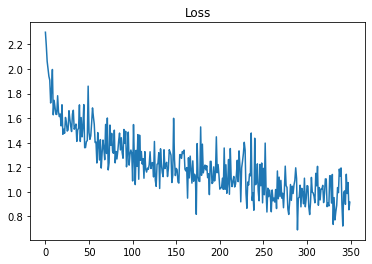

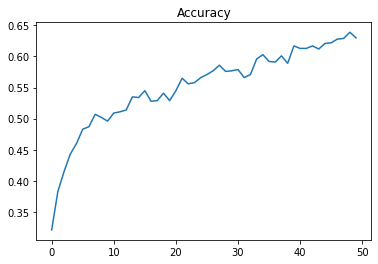

In [1]:
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision.transforms as T
import torchvision.datasets as dset
from torch.utils.data import sampler
import time


class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5,
                      stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5,
                      padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,
                      padding=1),
            nn.ReLU(True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,
                      padding=1),
            nn.ReLU(True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3,
                      padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(64*4*4, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 1024),
            nn.ReLU(True),
            nn.Linear(1024, num_classes),
        )

    def forward(self, x):
        out = self.features(x)
        out = out.view(-1, 64*4*4)
        out = self.classifier(out)
        return out


#  dataloader!
NUM = 49000
transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
cifar10_train = dset.CIFAR10('./datasets', train=True, download=True,
                             transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64,
                          sampler=sampler.SubsetRandomSampler(range(NUM)))
cifar10_val = dset.CIFAR10('./datasets', train=True, download=True,
                           transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64,
                        sampler=sampler.SubsetRandomSampler(range(NUM, 50000)))
cifar10_test = dset.CIFAR10('./datasets', train=True, download=True,
                            transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=64)

param = {}
param['lr'] = 1e-5
param['epochs'] = 50

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = AlexNet(num_classes=10).to(device).train()
# print(model)
criterion = nn.CrossEntropyLoss()
optim = optim.Adam(model.parameters(), lr=param['lr'])
total_step = len(loader_train)

losses = []
accs = []
time_start = time.time()

# train
for epoch in range(param['epochs']):
    for i, (image, label) in enumerate(loader_train):
        image = image.to(device, dtype=torch.float32)
        label = label.to(device, dtype=torch.long)

        scores = model(image)
        loss = criterion(scores, label)

        optim.zero_grad()
        loss.backward()
        optim.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/50], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, i + 1, total_step, loss.item()))
            losses.append(loss.item())

    with torch.no_grad():
        correct, total = 0, 0
        model = model.eval()
        # test!
        for image, label in loader_val:
            image = image.to(device, dtype=torch.float32)
            label = label.to(device, dtype=torch.long)
            output = model(image)
            _, pred = torch.max(output.data, 1)
            total += label.size(0)
            correct += (label == pred).sum().item()

        accuracy = correct/total
        accs.append(accuracy)
        print('Accuracy of the network on the test images: {:.2f} %'.format(100*accuracy))
    model = model.train()
time_end = time.time()

print('Time: {:.2f}'.format(time_end-time_start))
plt.figure()
plt.title('Loss')
plt.plot(losses)
plt.figure()
plt.title('Accuracy')
plt.plot(accs)
plt.show()

In [2]:
with torch.no_grad():
        correct, total = 0, 0
        model = model.eval()
        # test!
        for image, label in loader_test:
            image = image.to(device, dtype=torch.float32)
            label = label.to(device, dtype=torch.long)
            output = model(image)
            _, pred = torch.max(output.data, 1)
            total += label.size(0)
            correct += (label == pred).sum().item()

        accuracy = correct/total
        accs.append(accuracy)
        print('Accuracy of the network on the test images: {:.2f} %'.format(100*accuracy))

Accuracy of the network on the test images: 66.85 %


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
cuda
Epoch [1/50], Step [100/766], Loss: 2.2998
Epoch [1/50], Step [200/766], Loss: 2.2945
Epoch [1/50], Step [300/766], Loss: 2.2510
Epoch [1/50], Step [400/766], Loss: 2.1457
Epoch [1/50], Step [500/766], Loss: 2.1668
Epoch [1/50], Step [600/766], Loss: 2.0694
Epoch [1/50], Step [700/766], Loss: 2.0398
Accuracy of the network on the test images: 28.30 %
Epoch [2/50], Step [100/766], Loss: 1.9745
Epoch [2/50], Step [200/766], Loss: 1.8669
Epoch [2/50], Step [300/766], Loss: 1.9318
Epoch [2/50], Step [400/766], Loss: 1.9744
Epoch [2/50], Step [500/766], Loss: 1.8990
Epoch [2/50], Step [600/766], Loss: 1.9690
Epoch [2/50], Step [700/766], Loss: 1.8234
Accuracy of the network on the test images: 30.70 %
Epoch [3/50], Step [100/766], Loss: 1.9525
Epoch [3/50], Step [200/766], Loss: 1.9476
Epoch [3/50], Step [300/766], Loss: 1.9153
Epoch [3/50], Step [400/766], Loss: 1.8945
Epo

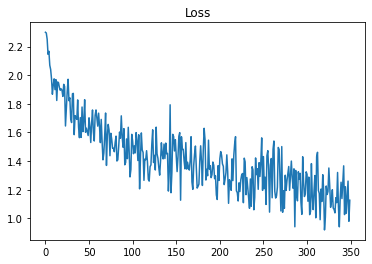

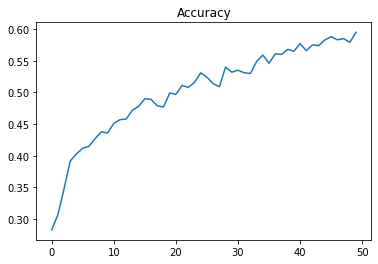

In [3]:
# VGG!!!!
import numpy as np
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision.transforms as T
import torchvision.datasets as dset
from torch.utils.data import sampler
import time


class VGG(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG, self).__init__()
        vgg = []

        vgg.append(nn.Conv2d(in_channels=3, out_channels=64,
                             kernel_size=3, stride=1, padding=1))
        vgg.append(nn.ReLU())
        vgg.append(nn.Conv2d(in_channels=64, out_channels=64,
                             kernel_size=3, stride=1, padding=1))
        vgg.append(nn.ReLU())
        vgg.append(nn.MaxPool2d(kernel_size=2, stride=2))

        vgg.append(nn.Conv2d(in_channels=64, out_channels=64,
                             kernel_size=3, stride=1, padding=1))
        vgg.append(nn.ReLU())
        vgg.append(nn.Conv2d(in_channels=64, out_channels=64,
                             kernel_size=3, stride=1, padding=1))
        vgg.append(nn.ReLU())
        vgg.append(nn.MaxPool2d(kernel_size=2, stride=2))
        # 8*8*64

        vgg.append(nn.Conv2d(in_channels=64, out_channels=64,
                             kernel_size=3, stride=1, padding=1))
        vgg.append(nn.ReLU())
        vgg.append(nn.Conv2d(in_channels=64, out_channels=64,
                             kernel_size=3, stride=1, padding=1))
        vgg.append(nn.ReLU())
        vgg.append(nn.Conv2d(in_channels=64, out_channels=64,
                             kernel_size=3, stride=1, padding=1))
        vgg.append(nn.ReLU())
        vgg.append(nn.MaxPool2d(kernel_size=2, stride=2))
        # 4*4*64

        self.main = nn.Sequential(*vgg)

        # 全连接层
        classfication = []
        classfication.append(
            nn.Linear(in_features=64*4*4, out_features=1024))
        classfication.append(nn.ReLU())
        classfication.append(nn.Dropout(p=0.5))
        classfication.append(nn.Linear(in_features=1024, out_features=1024))
        classfication.append(nn.ReLU())
        classfication.append(nn.Dropout(p=0.5))
        classfication.append(nn.Linear(in_features=1024, out_features=num_classes))

        self.classfication = nn.Sequential(*classfication)

    def forward(self, x):
        feature = self.main(x)
        feature = feature.view(x.size(0), -1)
        out = self.classfication(feature)
        return out


#  dataloader!
NUM = 49000
transform = T.Compose([
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])
cifar10_train = dset.CIFAR10('./datasets', train=True, download=True,
                             transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64,
                          sampler=sampler.SubsetRandomSampler(range(NUM)))
cifar10_val = dset.CIFAR10('./datasets', train=True, download=True,
                           transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64,
                        sampler=sampler.SubsetRandomSampler(range(NUM, 50000)))
cifar10_test = dset.CIFAR10('./datasets', train=True, download=True,
                            transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=64)

param = {}
param['lr'] = 1e-5
param['epochs'] = 50

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = VGG(num_classes=10).to(device).train()
# print(model)
criterion = nn.CrossEntropyLoss()
optim = optim.Adam(model.parameters(), lr=param['lr'])
total_step = len(loader_train)

losses = []
accs = []
time_start = time.time()

# train
for epoch in range(param['epochs']):
    for i, (image, label) in enumerate(loader_train):
        image = image.to(device, dtype=torch.float32)
        label = label.to(device, dtype=torch.long)

        scores = model(image)
        loss = criterion(scores, label)

        optim.zero_grad()
        loss.backward()
        optim.step()

        if (i+1) % 100 == 0:
            print('Epoch [{}/50], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, i + 1, total_step, loss.item()))
            losses.append(loss.item())

    with torch.no_grad():
        correct, total = 0, 0
        model = model.eval()
        # test!
        for image, label in loader_val:
            image = image.to(device, dtype=torch.float32)
            label = label.to(device, dtype=torch.long)
            output = model(image)
            _, pred = torch.max(output.data, 1)
            total += label.size(0)
            correct += (label == pred).sum().item()

        accuracy = correct/total
        accs.append(accuracy)
        print('Accuracy of the network on the test images: {:.2f} %'.format(100*accuracy))
    model = model.train()
time_end = time.time()

print('Time: {:.2f}'.format(time_end-time_start))
plt.figure()
plt.title('Loss')
plt.plot(losses)
plt.figure()
plt.title('Accuracy')
plt.plot(accs)
plt.show()

In [4]:
with torch.no_grad():
        correct, total = 0, 0
        model = model.eval()
        # test!
        for image, label in loader_test:
            image = image.to(device, dtype=torch.float32)
            label = label.to(device, dtype=torch.long)
            output = model(image)
            _, pred = torch.max(output.data, 1)
            total += label.size(0)
            correct += (label == pred).sum().item()

        accuracy = correct/total
        accs.append(accuracy)
        print('Accuracy of the network on the test images: {:.2f} %'.format(100*accuracy))

Accuracy of the network on the test images: 61.38 %
